일단 필요한 거
- 가져와서 모든 그래프 다 그려보기


In [4]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
analysis_path = {
    "articles":"C:/Users/lhi30/Haein/2023/YBIGTA/2023-2/DA/Writing_Advice/analyzed_data/article/articles_ytn_analysis.json",
    "abstract":"C:/Users/lhi30/Haein/2023/YBIGTA/2023-2/DA/Writing_Advice/analyzed_data/abstract/abstract_analysis.json",
    "essay":"C:/Users/lhi30/Haein/2023/YBIGTA/2023-2/DA/Writing_Advice/analyzed_data/essay/essay_analysis.json",
    "literature":"C:/Users/lhi30/Haein/2023/YBIGTA/2023-2/DA/Writing_Advice/analyzed_data/literature/literature_analysis.json",
    }
data_path = {
    "articles":"C:/Users/lhi30/Haein/2023/YBIGTA/2023-2/DA/Writing_Advice/analyzed_data/article/articles_data.json",
    "abstract":"C:/Users/lhi30/Haein/2023/YBIGTA/2023-2/DA/Writing_Advice/analyzed_data/abstract/abstract_data.json",
    "essay":"C:/Users/lhi30/Haein/2023/YBIGTA/2023-2/DA/Writing_Advice/analyzed_data/essay/essay_data.json",
    "literature":"C:/Users/lhi30/Haein/2023/YBIGTA/2023-2/DA/Writing_Advice/analyzed_data/literature/literature_data.json",
}
category = "abstract"
with open(analysis_path[category]) as json_file:
        analysis = json.load(json_file)
with open(data_path[category]) as json_file:
        data = json.load(json_file)

In [141]:
def draw_graph(distribution, new_input = 0, ):
    fig, ax = plt.subplots()
    fig.set_facecolor('white')
    ax.hist(distribution, bins = 100, color = '#cdb79e', density = True)
    ax.axvline(new_input, color = '#000080')
    plt.show()

In [18]:
analysis.keys()

dict_keys(['string_length', 'num_tokens', 'num_sentences', 'num_token_sentences', 'pos_freq', 'token_variety', 'rel_position'])

In [91]:
def list_extend(lst):
    result = []
    for el in lst:
        result.extend(el)
    return result
def rel_pos_extend(dct):
    for k, v in dct.items():
        dct[k] = list_extend(v)
    return dct
def dict_extend(lst):
    result = {}
    for dct in lst:
        for k, v in dct.items():
            if k in result.keys():
                result[k].extend(v)
            else: 
                result[k] = v

    return result    
def freq_extend(lst):
    result = {}
    for dct in lst:
        for k, v in dct.items():
            if k in result.keys():
                if isinstance(result[k], list):
                    result[k].append(v)
                else:
                    result[k] = [result[k], v]
            else:
                result[k] = v
    return result
    

In [95]:
len(flat_a_rel_freq.keys())

43

In [93]:
flat_token_variety = list_extend(analysis['token_variety'])
flat_rel_position = rel_pos_extend(dict_extend(analysis['rel_position']))
flat_num_token_sentences = list_extend(analysis['num_token_sentences'])
flat_s_rel_freq = freq_extend(list_extend(analysis['pos_freq']['s_rel_freq']))
flat_a_rel_freq = freq_extend(analysis['pos_freq']['a_rel_freq'])

In [132]:
distributions = {
    "token_variety": flat_token_variety,
    "rel_position": flat_rel_position,
    "num_token_sentences": flat_num_token_sentences,
    "s_rel_freq": flat_s_rel_freq,
    "a_rel_freq": flat_a_rel_freq
}

In [104]:
kkma_groups = {
    'N': [{'NNG', 'NNP', 'NNB', 'NNM'}, "체언"],
    'V': [{'VV', 'VA', 'VXV', 'VXA', 'VCP', 'VCN'}, '용언'],
    'VV': [{'VV'}, '동사'],
    'VA': [{'VA'},'형용사'],
    'VX': [{'VXV', 'VXA'}, '보조 용언'],
    'VC': [{'VCP', 'VCN'}, '긍정/부정 지정사'],
    'MD': [{'MDT', 'MDN'}, '관형사'],
    'MA': [{'MAG', 'MAC'}, '부사'],
    'IC': [{'IC'}, '감탄사'],
    'J': [{'JKS', 'JKC', 'JKG', 'JKO', 'JKM', 'JKI', 'JKQ', 'JX', 'JC'}, '조사'],
    'EP': [{'EPH', 'EPT', 'EPP'}, '선어말 어미'],
    'EFN': [{'EFN'}, '평서형 종결 어미'],
    'EFQ': [{'EFQ'}, '의문형 종결 어미'],
    'EFO': [{'EFO'}, '명령형 종결 어미'],
    'EFA': [{'EFA'}, '청유형 종결 어미'],
    'EFI': [{'EFI'}, '감탄형 종결 어미'],
    'EFR': [{'EFR'}, '존칭형 종결 어미'],
    'EC': [{'ECE', 'ECD', 'ECS'}, '연결 어미'],
    'ET': [{'ETN', 'ETD'}, '전성 어미'],
    'X': [{'XPN', 'XPV', 'XSN', 'XSV', 'XSA', 'XR'}, '접두/접미사, 어근'],
    'SF': [{'SF'}, '마침표, 물음표, 느낌표'],
    'SP': [{'SP'}, '쉼표, 가운뎃점, 콜론, 빗금'],
    'SS': [{'SS'}, '따옴표, 괄호표, 줄표'],
    'SE': [{'SE'}, '줄임표'],
    'SO': [{'SO'}, '붙임표'],
    'SW': [{'SW'}, '기타 기호'],
    'U': [{'UN', 'UV', 'UE'}, '분석 불능'],
    'OL': [{'OL'}, '외국어'],
    'OH': [{'OH'}, '한자'],
    'ON': [{'ON'}, '숫자'],
}
len(kkma_groups.keys())

30

In [99]:
def check_key(key,  value, target_dct):
    if key in target_dct.keys():
        if isinstance(target_dct[key], list) and isinstance(value, list):
            target_dct[key].extend(value)
        elif isinstance(target_dct[key], list) and not isinstance(value, list):
            target_dct[key].append(value)
        else:
            target_dct = [target_dct[key], value]
    else:
        target_dct[key] = value
            
def pos_group(dct, kkma_groups):
    result = {}
    for k, v in dct.items():
        for kk, vv in kkma_groups.items():
            if k in vv[0]:
                check_key(kk, v, result)
    return result

In [138]:
flat_a_regroup = pos_group(flat_a_rel_freq, kkma_groups)
flat_s_regroup = pos_group(flat_s_rel_freq, kkma_groups)
flat_position_regroup = pos_group(flat_rel_position, kkma_groups)

In [140]:
regrouped_distributions = {
    "token_variety": flat_token_variety,
    "rel_position": flat_position_regroup,
    "num_token_sentences": flat_num_token_sentences,
    "s_rel_freq": flat_s_regroup,
    "a_rel_freq": flat_a_regroup,
}

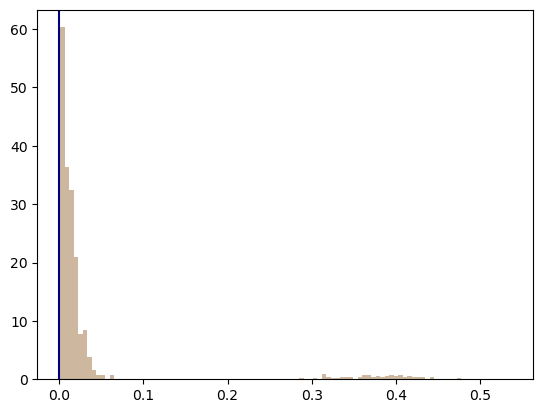

In [142]:
draw_graph(flat_a_regroup['N'])

In [120]:
def find_percentage(new_input: int, distribution):
    distribution = np.array(distribution)
    under = len(distribution[distribution < new_input])
    over = len(distribution[distribution > new_input])
    if over < under:
        higher_than_most = True
        result = (over / len(distribution)) * 100
    else:
        higher_than_most = False
        result = (under / len(distribution)) * 100
    return (higher_than_most, result)

In [128]:
def interpret(higher_than_most: bool, result: float, tag: str, kkma_groups: dict, category: str):
    name = kkma_groups[tag][1]
    c_dict = {'articles': '기사',
              'abstract': '논문 초록', 
              'essay': '에세이',
              'literature': '소설'}
    if higher_than_most:
        return f"너는 {c_dict[category]}의 {100 - result:.2f}% 보다 {name}(을/를) 많이 사용했다."
    else:
        return f"너는 {c_dict[category]}의 {100 - result:.2f}% 보다 {name}(을/를) 적게 사용했다."

(False, 39.150354019158684)


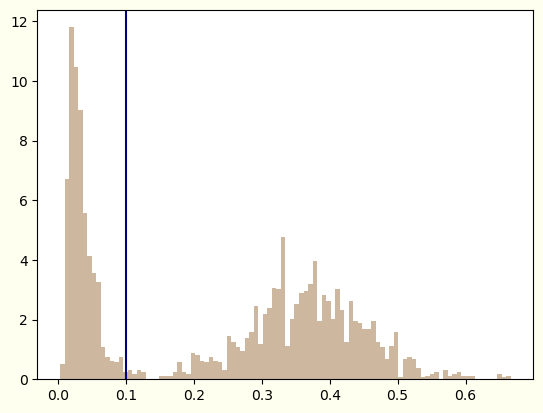

너는 논문 초록의 60.85% 보다 체언(을/를) 적게 사용했다.


In [131]:
higher, percent = find_percentage(0.1, flat_s_regroup['N'])
print(find_percentage(0.1, flat_s_regroup['N']))
draw_graph(flat_s_regroup['N'], 0.1)
print(interpret(higher, percent, 'N', kkma_groups, 'abstract'))